In [5]:
import os
import pandas as pd
import face_recognition
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Definir la ruta de la carpeta que contiene las imágenes
ruta_carpeta = 'C:\\Users\\Waldosir\\Documents\\2doCodigo\\RecPatron\\BD\\Lung X-Ray Image\\Lung X-Ray Image'



Recorremos toda la carpeta y hacemos una matriz con todos los datos de todas las imagenes

In [6]:
# Crear una lista para almacenar los datos de las imágenes
datos_imagen_recortada = {}
directorio = {'Imagen': [], 'Etiqueta': []}
# Recorrer la carpeta para buscar archivos jpg
for carpeta_nombre in os.listdir(ruta_carpeta):
    carpeta_ruta = os.path.join(ruta_carpeta, carpeta_nombre)
    if os.path.isdir(carpeta_ruta):
        for archivo_nombre in os.listdir(carpeta_ruta):
            try:
                archivo_ruta = os.path.join(carpeta_ruta, archivo_nombre)
                
                # Cargar la imagen utilizando PIL (Pillow)
                imagen = face_recognition.load_image_file(archivo_ruta)
                
                # Redimensionar la imagen a 150x150
                imagen_redimensionada = np.array(Image.fromarray(imagen).resize((150, 150)))



                
                #datos_imagen_recortada.append([imagen_redimensionada, caracteristicas,cara_recortada,carpeta_nombre])
                directorio['Imagen'].append(imagen_redimensionada)
                directorio['Etiqueta'].append(carpeta_nombre)
                
            except Exception as e:
                print("Error en archivo:"+str(archivo_nombre)+":"+str(e))
print("Proceso terminado")

Proceso terminado


Transformamos los datos a un pandas

In [7]:
columnas = ['Imagen','Etiqueta']
df = pd.DataFrame(directorio, columns=columnas)


In [8]:
df.head()

,Imagen,Etiqueta
0,"[[[68, 15, 97], [70, 17, 99], [70, 17, 99], [6...",Lung_Opacity
1,"[[[52, 22, 96], [69, 31, 108], [67, 17, 99], [...",Lung_Opacity
2,"[[[69, 1, 84], [69, 1, 84], [67, 0, 82], [67, ...",Lung_Opacity
3,"[[[70, 8, 91], [70, 8, 91], [70, 8, 91], [70, ...",Lung_Opacity
4,"[[[75, 3, 93], [75, 19, 103], [69, 33, 111], [...",Lung_Opacity


Conversion a JSON. Es muy pesado, por lo que pasamos de ello.

In [22]:
#df_imagenes_recortadas.to_json('test.csv')

In [23]:
#df_jason = pd.read_json('test.csv')
#df_jason.head()

Pickle es una buena opción. Este se usa para serializar objetos en Python. Lamentablemente su uso está únicamente destinado a Python

In [24]:
#df_imagenes_recortadas.to_pickle('test.pkl')

In [25]:
#df_pickle = pd.read_pickle('test.pkl')
#df_pickle.head()

HDF5 es una gran opción. Se usa para el manejo de datos y pueden utilizarlo otros lenguajes o programas como MATLAB y Java. Está destinado para manejo de grandes datos.

Instalar tables para usar hdf5

In [13]:
#pip install tables

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 4.3 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 16.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.7/374.7 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 385.1/385.1 kB 24.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [9]:
df.to_hdf('BD_Lungs.h5', key='dataframe', mode='w')

C:\Users\Waldosir\AppData\Local\Temp\ipykernel_22028\660048952.py:1: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block0_values] [items->Index(['Imagen', 'Etiqueta'], dtype='object')]

  df.to_hdf('BD_Lungs.h5', key='dataframe', mode='w')


Leer el archivo creado

In [10]:
df_HDF = pd.read_hdf('BD_Lungs.h5')


In [11]:
df_HDF.head()

,Imagen,Etiqueta
0,"[[[68, 15, 97], [70, 17, 99], [70, 17, 99], [6...",Lung_Opacity
1,"[[[52, 22, 96], [69, 31, 108], [67, 17, 99], [...",Lung_Opacity
2,"[[[69, 1, 84], [69, 1, 84], [67, 0, 82], [67, ...",Lung_Opacity
3,"[[[70, 8, 91], [70, 8, 91], [70, 8, 91], [70, ...",Lung_Opacity
4,"[[[75, 3, 93], [75, 19, 103], [69, 33, 111], [...",Lung_Opacity


Nuevamente visualizamos los datos para ver que si esten correctamente

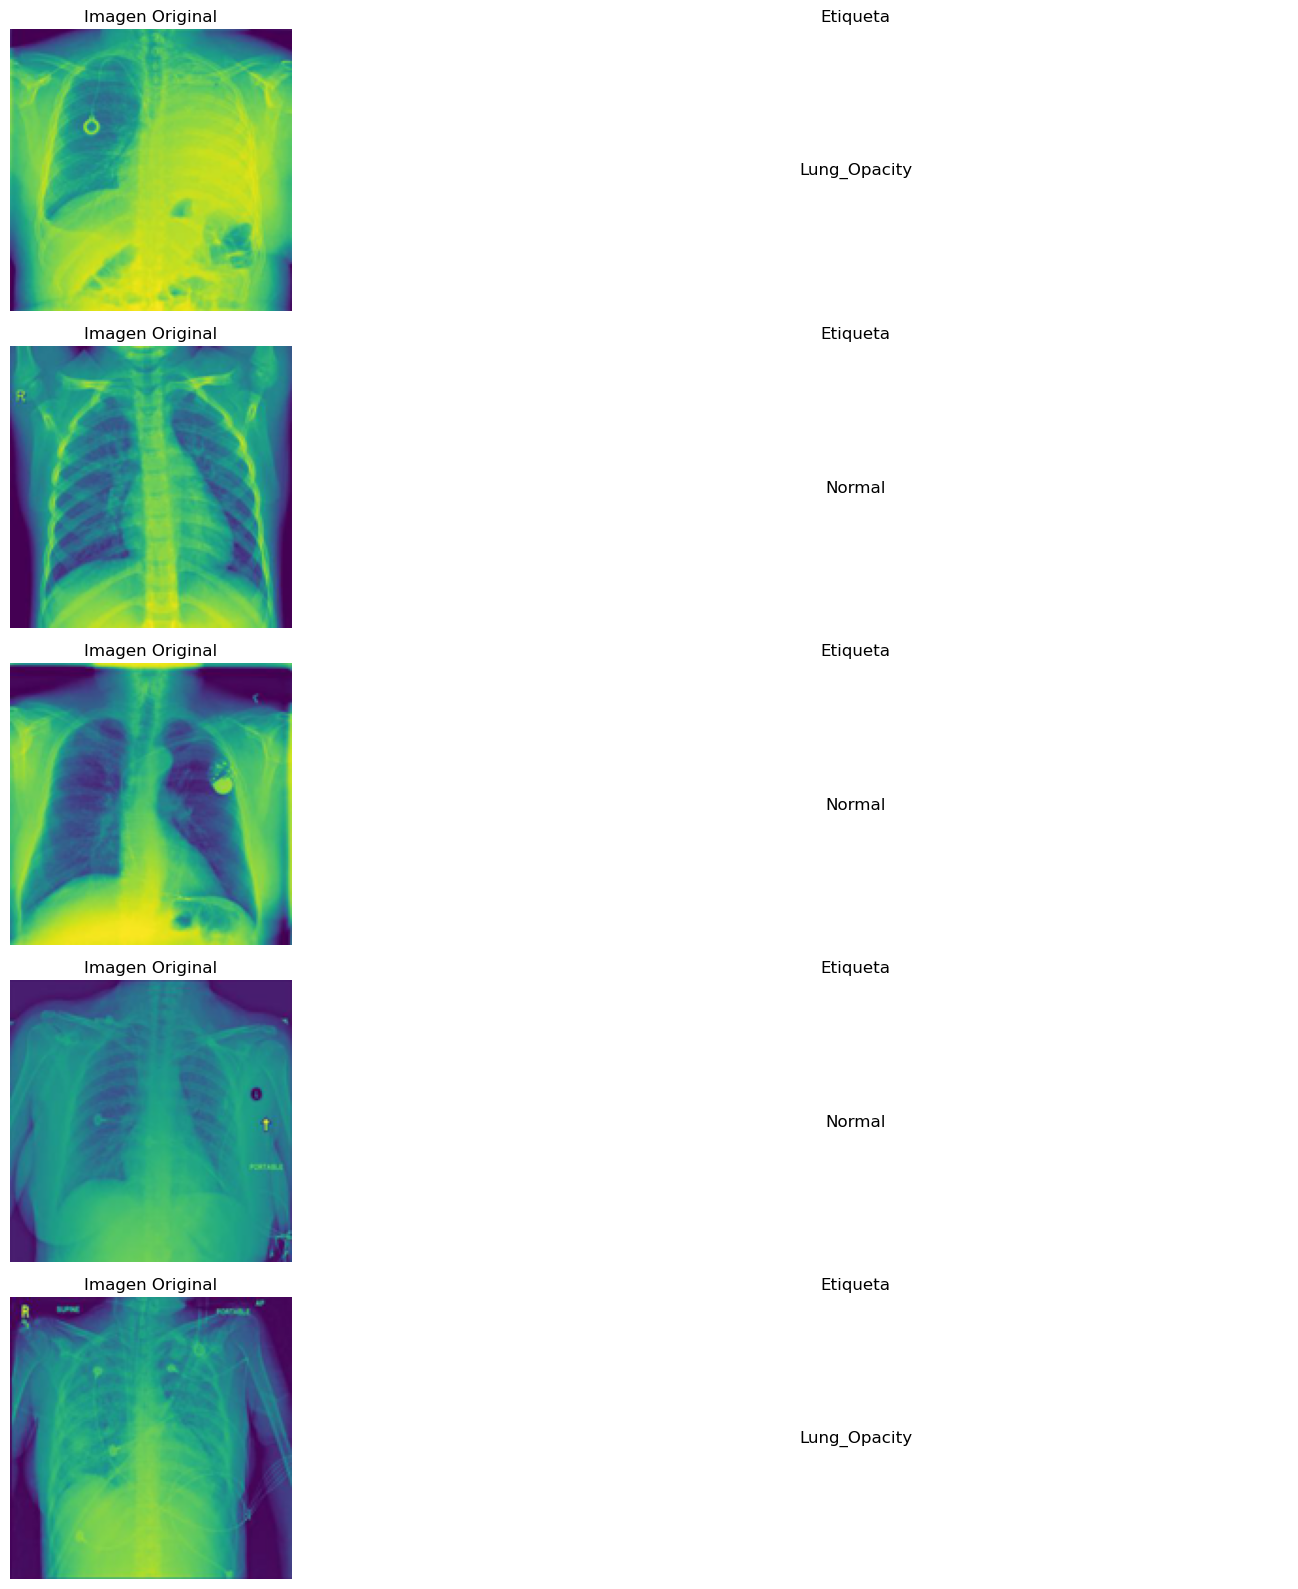

In [12]:
df_ejemploHDF = df_HDF.sample(n=5)

# Visualizar las imágenes seleccionadas con los rostros detectados y los landmarks faciales
fig, axes = plt.subplots(nrows=len(df_ejemploHDF), ncols=2, figsize=(16, 16))

for i, (index, row) in enumerate(df_ejemploHDF.iterrows()):
    # Subgráfico para la imagen original
    ax0 = axes[i, 0]
    ax0.imshow(row['Imagen'])
    ax0.set_title("Imagen Original")
    ax0.axis('off')
    

    
    # Subgráfico para la emoción (si está disponible)
    ax3 = axes[i, 1]
    # Aquí puedes agregar código para mostrar la emoción en lugar de un gráfico vacío
    ax3.text(0.5, 0.5, row['Etiqueta'], horizontalalignment='center', verticalalignment='center', fontsize=12)
    ax3.set_title("Etiqueta")
    ax3.axis('off')

plt.tight_layout()
plt.show()